## Make figure which illustrates the switch from DD to constant light, a long T-cycle, and a short T-cycle for the strong oscillator

## Import needed libraries

In [1]:
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
from scipy import signal
from scipy.signal import argrelextrema
import pandas as pd
import seaborn as sns

## Plot mRNA concentration dynamic for transition from DD to LL (constant light) for strong oscillator

24 23.95199599966665 0.3650000000000002
vs, ks, light_sens =  1.6 0.3650000000000002 0.05
integrating and plotting...


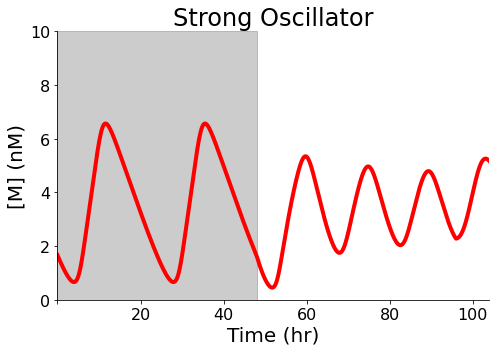

In [2]:
"""
Model of circadian oscillator with entraiment
"""
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
from scipy import signal
from scipy.signal import argrelextrema
import pandas as pd
import seaborn as sns


def hill_up(x, k, n):
    h = np.power(x,n)/(np.power(k,n) + np.power(x,n))
    return h
    
def hill_down(x, k, n):
    h = np.power(k,n)/(np.power(k,n) + np.power(x,n))
    return h

def square_wave(t, period, amp):
    wave = amp*signal.square(2 * np.pi * t/period)+amp
    return wave

def square_wave_flipped(t, period, amp):
    if (t < T_transients):
        wave = 0
    else:
        wave = amp - amp*signal.square(2 * np.pi * t/period)
    return wave
            
# solve the system dy/dt = f(y, t)
def df(y, t):
    #assign input vector,y to variables of the model
    M  = y[0]
    PC = y[1]
    PN = y[2]

    # mRNA expression hill_down(x, k, n)
    dM =  vs*hill_down(PN, KI, 4) - vm*hill_up(M, Km, 1) - square_wave_flipped(t, total_time_DD*2, light_sens)*M
    # Protein concentration, PC - celllular, PN - nuclear
    dPC =   ks*M + k2*PN - k1*PC    - vd*hill_up(PC, Kd, 1)
    dPN =        - k2*PN + k1*PC
    # output right-hand side of differetial equations
    return [dM, dPC, dPN]

#-----------------------------------------------------------------------------------------------
#   Make a dataframe with oscillator description, such as type and color it would be plotted
#    The index of the dataframe contain parameter vaule of an oscillator
#-----------------------------------------------------------------------------------------------
def oscillator_summary():
    vs_list   = [1.6]
    vs_names  = ['Strong']
    vs_colors = ['r']
    df = pd.DataFrame(zip(vs_names, vs_colors), columns =[ 'type', 'color'], index = vs_list)
    return(df)

# Choose total time of simulation, T

T = 288. + 104.
# Chose trainsients time
T_transients = 288.
T_plot = T - T_transients

# Chose time step
dt=0.05

#Calculate number of time steps
nsteps=int(T/dt)

# Calculate number of indices in transient part
trans_ind = int(T_transients/dt)

# Create time grid
t  = np.linspace(0, T, nsteps) 


# Choose initial conditions
M0  = 0.89009363    
PC0 = 0.83699889
PN0 = 1.25723695
y0= [2.1740351,  3.22519908, 3.13304933]  

# Paramters of the model
#vs = 1.6
vm = 0.505
Km = 0.5
KI = 1.0
#ks = 0.303
vd = 1.4
Kd = 0.13
k1 = 0.5
k2 = 0.6

vs_df = oscillator_summary()
light_sens_list  = [0.05]
num_periods_in_DD = 2
frp_choice = 24
total_time_DD = num_periods_in_DD * frp_choice

count = int(T_plot/(total_time_DD*2))

for vs in vs_df.index:
    df_protocol= pd.read_csv(vs_df.type[vs]+'_periods_ks.csv', index_col = 0)
    ks  = df_protocol.ks[frp_choice]
    entr_period = df_protocol.periods[frp_choice]
    print(frp_choice,entr_period,ks)
    for light_sens in light_sens_list:
        # Solve ODE and plot mRNA concentraion, M
        print('vs, ks, light_sens = ',vs,ks,light_sens)
        print('integrating and plotting...')
        soln = odeint(df, y0, t)
        M  = soln[trans_ind:, 0]
        PC = soln[trans_ind:, 1]            
        time = t[trans_ind:]-t[trans_ind]  
        plt.figure(figsize=(7,5))
        plt.plot(time, M, vs_df.color[vs], linewidth=4) 
        plt.fill([0,0,total_time_DD,total_time_DD],[0,10,10,0],'k', alpha=0.2, edgecolor='k')
        plt.xlabel("Time (hr)",fontsize=20)
        plt.ylabel("[M] (nM)",fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.xlim(0,T_plot)
        plt.ylim(0,10)
        ax = plt.gca()
        xticks = ax.xaxis.get_major_ticks() 
        xticks[0].label1.set_visible(False)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        title_string = vs_df.type[vs] + ' Oscillator'
        plt.title(title_string,fontsize=24)
        plt.tight_layout()
        filename = "Const-light-effect-"+vs_df.type[vs]+"-"+str(light_sens)+".jpeg"
        plt.savefig(filename, dpi = 300)
        plt.show()             

## Plot mRNA concentration dynamic for transition from DD to 20-hr T-cycle for strong oscillator

start of sqr wave:  336.0 4.0
time of square wave start by index:  336.0428626100268
24 23.95199599966665 0.3650000000000002
vs, ks, light_sens =  1.6 0.3650000000000002 0.05
integrating and plotting...


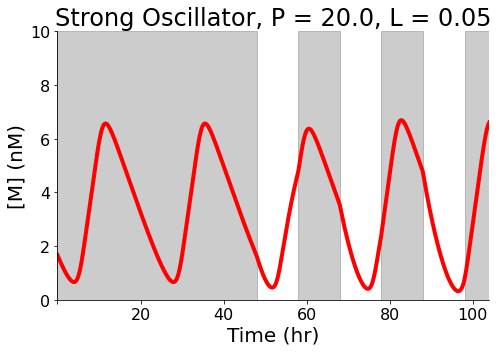

In [3]:
"""
Model of circadian oscillator with entraiment
"""
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
from scipy import signal
from scipy.signal import argrelextrema
import pandas as pd
import seaborn as sns


def hill_up(x, k, n):
    h = np.power(x,n)/(np.power(k,n) + np.power(x,n))
    return h
    
def hill_down(x, k, n):
    h = np.power(k,n)/(np.power(k,n) + np.power(x,n))
    return h

def square_wave(t, period, amp):
    wave = amp*signal.square(2 * np.pi * t/period)+amp
    return wave

def square_wave_delayed(t, period, amp):
    if (t < (T_transients + total_time_DD)):
        wave = 0
    else:
        t_after_DD = t - T_transients - total_time_DD
        wave = amp + amp*signal.square(2 * np.pi * t_after_DD/period)
    return wave
            
# solve the system dy/dt = f(y, t)
def df(y, t):
    #assign input vector,y to variables of the model
    M  = y[0]
    PC = y[1]
    PN = y[2]

    # mRNA expression hill_down(x, k, n)
    dM =  vs*hill_down(PN, KI, 4) - vm*hill_up(M, Km, 1) - square_wave_delayed(t, P_pulse, light_sens)*M
    # Protein concentration, PC - celllular, PN - nuclear
    dPC =   ks*M + k2*PN - k1*PC    - vd*hill_up(PC, Kd, 1)
    dPN =        - k2*PN + k1*PC
    # output right-hand side of differetial equations
    return [dM, dPC, dPN]

#-----------------------------------------------------------------------------------------------
#   Make a dataframe with oscillator description, such as type and color it would be plotted
#    The index of the dataframe contain parameter vaule of an oscillator
#-----------------------------------------------------------------------------------------------
def oscillator_summary():
    vs_list   = [ 1.6   ]
    vs_names  = ['Strong']
    vs_colors = ['r']
    df = pd.DataFrame(zip(vs_names, vs_colors), columns =[ 'type', 'color'], index = vs_list)
    return(df)

# Set simulation time parameters
P_frp = 24
P_pulse = 20.0
np_DD = 2
np_pulse = 2.8
tt_DD = np_DD * P_frp
T = P_frp*12 + tt_DD + P_pulse*np_pulse
# Find transients time
T_transients = P_frp*12
T_plot = T - T_transients

nsteps_pulses = int(P_pulse*np_pulse/dt)
t_sqrwv = np.linspace(P_frp*12 + tt_DD,T,nsteps_pulses)
sqrwv = np.linspace(0,0,nsteps_pulses)
amplitude = 2.0
for i in range(0,nsteps_pulses):
    tval = t_sqrwv[i]
    sqrwv[i] = square_wave_delayed(tval,P_pulse,amplitude)

print('start of sqr wave: ',t_sqrwv[0],sqrwv[0])
    
# Chose time step
dt=0.05

#Calculate number of time steps
nsteps=int(T/dt)

# Calculate number of indices in transient part
trans_ind = int(T_transients/dt)

#Calculate number of indices in sqrwv part
sqrwv_ind = int((T_transients+tt_DD)/dt)

print('time of square wave start by index: ',t[sqrwv_ind])

# Create time grid
t  = np.linspace(0, T, nsteps) 

# Choose initial conditions
M0  = 0.89009363    
PC0 = 0.83699889
PN0 = 1.25723695
y0= [2.1740351,  3.22519908, 3.13304933]  

# Paramters of the model
#vs = 1.6
vm = 0.505
Km = 0.5
KI = 1.0
#ks = 0.303
vd = 1.4
Kd = 0.13
k1 = 0.5
k2 = 0.6

vs_df = oscillator_summary()
light_sens_list    = [0.05]

for vs in vs_df.index:
    df_protocol= pd.read_csv(vs_df.type[vs]+'_periods_ks.csv', index_col = 0)
    ks  = df_protocol.ks[P_frp]
    entr_period = df_protocol.periods[P_frp]
    print(P_frp,entr_period,ks)
    for light_sens in light_sens_list:
        # Solve ODE and plot mRNA concentraion, M
        print('vs, ks, light_sens = ',vs,ks,light_sens)
        print('integrating and plotting...')
        soln = odeint(df, y0, t)
        M  = soln[trans_ind:, 0]
        PC = soln[trans_ind:, 1]            
        time = t[trans_ind:]-t[trans_ind]
        t_sqrwv_adj = t_sqrwv - t[trans_ind]
#        print(t[trans_ind])
#       print(t[sqrwv_ind])
#       print(t_sqrwv_adj[0])
        plt.figure(figsize=(7,5))
        plt.plot(time, M, vs_df.color[vs], linewidth=4) 
#        plt.plot(t_sqrwv_adj, sqrwv, 'k', linewidth = 2)
        plt.plot()
        plt.fill([0,0,total_time_DD,total_time_DD],[0,10,10,0],'k', alpha=0.2, edgecolor='k')
        plt.fill([total_time_DD+P_pulse/2,total_time_DD+P_pulse/2,total_time_DD+P_pulse,total_time_DD+P_pulse],[0,10,10,0],'k', alpha=0.2, edgecolor='k')
        plt.fill([total_time_DD+3*P_pulse/2,total_time_DD+3*P_pulse/2,total_time_DD+2*P_pulse,total_time_DD+2*P_pulse],[0,10,10,0],'k', alpha=0.2, edgecolor='k')
        plt.fill([total_time_DD+5*P_pulse/2,total_time_DD+5*P_pulse/2,total_time_DD+3*P_pulse,total_time_DD+3*P_pulse],[0,10,10,0],'k', alpha=0.2, edgecolor='k')
        plt.xlabel("Time (hr)",fontsize=20)
        plt.ylabel("[M] (nM)",fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.xlim(0,T_plot)
        plt.ylim(0,10)
        ax = plt.gca()
        xticks = ax.xaxis.get_major_ticks() 
        xticks[0].label1.set_visible(False)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        title_string = vs_df.type[vs] + ' Oscillator, ' + 'P = ' + str(P_pulse) + ', L = ' + str(light_sens)
        plt.title(title_string,fontsize=24)
        plt.tight_layout()
        filename = "Fig-DD-"+vs_df.type[vs]+"-lp"+str(P_pulse)+"-ls"+str(light_sens)+".jpeg"
        plt.savefig(filename, dpi = 300)
        plt.show()             

## Plot mRNA concentration dynamic for transition from DD to 28-hr T-cycle for strong oscillator

start of sqr wave:  336.0 4.0
time of square wave start by index:  336.0428626100268
24 23.95199599966665 0.3650000000000002
vs, ks, light_sens =  1.6 0.3650000000000002 0.05
integrating and plotting...


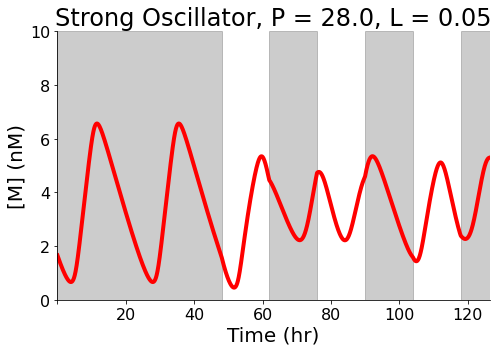

In [4]:
"""
Model of circadian oscillator with entraiment
"""
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
from scipy import signal
from scipy.signal import argrelextrema
import pandas as pd
import seaborn as sns


def hill_up(x, k, n):
    h = np.power(x,n)/(np.power(k,n) + np.power(x,n))
    return h
    
def hill_down(x, k, n):
    h = np.power(k,n)/(np.power(k,n) + np.power(x,n))
    return h

def square_wave(t, period, amp):
    wave = amp*signal.square(2 * np.pi * t/period)+amp
    return wave

def square_wave_delayed(t, period, amp):
    if (t < (T_transients + total_time_DD)):
        wave = 0
    else:
        t_after_DD = t - T_transients - total_time_DD
        wave = amp + amp*signal.square(2 * np.pi * t_after_DD/period)
    return wave
            
# solve the system dy/dt = f(y, t)
def df(y, t):
    #assign input vector,y to variables of the model
    M  = y[0]
    PC = y[1]
    PN = y[2]

    # mRNA expression hill_down(x, k, n)
    dM =  vs*hill_down(PN, KI, 4) - vm*hill_up(M, Km, 1) - square_wave_delayed(t, P_pulse, light_sens)*M
    # Protein concentration, PC - celllular, PN - nuclear
    dPC =   ks*M + k2*PN - k1*PC    - vd*hill_up(PC, Kd, 1)
    dPN =        - k2*PN + k1*PC
    # output right-hand side of differetial equations
    return [dM, dPC, dPN]

#-----------------------------------------------------------------------------------------------
#   Make a dataframe with oscillator description, such as type and color it would be plotted
#    The index of the dataframe contain parameter vaule of an oscillator
#-----------------------------------------------------------------------------------------------
def oscillator_summary():
    vs_list   = [ 1.6   ]
    vs_names  = ['Strong']
    vs_colors = ['r']
    df = pd.DataFrame(zip(vs_names, vs_colors), columns =[ 'type', 'color'], index = vs_list)
    return(df)

# Set simulation time parameters
P_frp = 24
P_pulse = 28.0
np_DD = 2
np_pulse = 2.8
tt_DD = np_DD * P_frp
T = P_frp*12 + tt_DD + P_pulse*np_pulse
# Find transients time
T_transients = P_frp*12
T_plot = T - T_transients

nsteps_pulses = int(P_pulse*np_pulse/dt)
t_sqrwv = np.linspace(P_frp*12 + tt_DD,T,nsteps_pulses)
sqrwv = np.linspace(0,0,nsteps_pulses)
amplitude = 2.0
for i in range(0,nsteps_pulses):
    tval = t_sqrwv[i]
    sqrwv[i] = square_wave_delayed(tval,P_pulse,amplitude)

print('start of sqr wave: ',t_sqrwv[0],sqrwv[0])
    
# Chose time step
dt=0.05

#Calculate number of time steps
nsteps=int(T/dt)

# Calculate number of indices in transient part
trans_ind = int(T_transients/dt)

#Calculate number of indices in sqrwv part
sqrwv_ind = int((T_transients+tt_DD)/dt)

print('time of square wave start by index: ',t[sqrwv_ind])

# Create time grid
t  = np.linspace(0, T, nsteps) 

# Choose initial conditions
M0  = 0.89009363    
PC0 = 0.83699889
PN0 = 1.25723695
y0= [2.1740351,  3.22519908, 3.13304933]  

# Paramters of the model
#vs = 1.6
vm = 0.505
Km = 0.5
KI = 1.0
#ks = 0.303
vd = 1.4
Kd = 0.13
k1 = 0.5
k2 = 0.6

vs_df = oscillator_summary()
light_sens_list    = [0.05]

for vs in vs_df.index:
    df_protocol= pd.read_csv(vs_df.type[vs]+'_periods_ks.csv', index_col = 0)
    ks  = df_protocol.ks[P_frp]
    entr_period = df_protocol.periods[P_frp]
    print(P_frp,entr_period,ks)
    for light_sens in light_sens_list:
        # Solve ODE and plot mRNA concentraion, M
        print('vs, ks, light_sens = ',vs,ks,light_sens)
        print('integrating and plotting...')
        soln = odeint(df, y0, t)
        M  = soln[trans_ind:, 0]
        PC = soln[trans_ind:, 1]            
        time = t[trans_ind:]-t[trans_ind]
        t_sqrwv_adj = t_sqrwv - t[trans_ind]
#        print(t[trans_ind])
#       print(t[sqrwv_ind])
#       print(t_sqrwv_adj[0])
        plt.figure(figsize=(7,5))
        plt.plot(time, M, vs_df.color[vs], linewidth=4) 
#        plt.plot(t_sqrwv_adj, sqrwv, 'k', linewidth = 2)
        plt.plot()
        plt.fill([0,0,total_time_DD,total_time_DD],[0,10,10,0],'k', alpha=0.2, edgecolor='k')
        plt.fill([total_time_DD+P_pulse/2,total_time_DD+P_pulse/2,total_time_DD+P_pulse,total_time_DD+P_pulse],[0,10,10,0],'k', alpha=0.2, edgecolor='k')
        plt.fill([total_time_DD+3*P_pulse/2,total_time_DD+3*P_pulse/2,total_time_DD+2*P_pulse,total_time_DD+2*P_pulse],[0,10,10,0],'k', alpha=0.2, edgecolor='k')
        plt.fill([total_time_DD+5*P_pulse/2,total_time_DD+5*P_pulse/2,total_time_DD+3*P_pulse,total_time_DD+3*P_pulse],[0,10,10,0],'k', alpha=0.2, edgecolor='k')
        plt.xlabel("Time (hr)",fontsize=20)
        plt.ylabel("[M] (nM)",fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.xlim(0,T_plot)
        plt.ylim(0,10)
        ax = plt.gca()
        xticks = ax.xaxis.get_major_ticks() 
        xticks[0].label1.set_visible(False)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        title_string = vs_df.type[vs] + ' Oscillator, ' + 'P = ' + str(P_pulse) + ', L = ' + str(light_sens)
        plt.title(title_string,fontsize=24)
        plt.tight_layout()
        filename = "Fig-DD-"+vs_df.type[vs]+"-lp"+str(P_pulse)+"-ls"+str(light_sens)+".jpeg"
        plt.savefig(filename, dpi = 300)
        plt.show()             

## Add respective labels A,B,C to the three subplots

In [5]:

import sys
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

mimageA = Image.open('Const-light-effect-Strong-0.05.jpeg')

draw = ImageDraw.Draw(mimageA)
font = ImageFont.truetype('arialbd', 72)
draw.text((0, 0),"A",fill = 'black', font = font)
mimageA.save('Const-light-effect-Strong-0.05-A.jpeg')

mimageB = Image.open('Fig-DD-Strong-lp28.0-ls0.05.jpeg')

draw = ImageDraw.Draw(mimageB)
font = ImageFont.truetype('arialbd', 72)
draw.text((0, 0),"B",fill = 'black', font = font)
mimageB.save('Fig-DD-Strong-lp28.0-ls0.05-B.jpeg')

mimageC = Image.open('Fig-DD-Strong-lp20.0-ls0.05.jpeg')

draw = ImageDraw.Draw(mimageC)
font = ImageFont.truetype('arialbd', 72)
draw.text((0, 0),"C",fill = 'black', font = font)
mimageC.save('Fig-DD-Strong-lp20.0-ls0.05-C.jpeg')

## Merge three panels vertically into the full figure

In [6]:
import numpy as np

images = [Image.open(x) for x in ['Const-light-effect-Strong-0.05-A.jpeg',  'Fig-DD-Strong-lp28.0-ls0.05-B.jpeg', 'Fig-DD-Strong-lp20.0-ls0.05-C.jpeg']]
widths, heights = zip(*(i.size for i in images))

avg_width = int(np.average(widths))
avg_height = int(np.average(heights))

print(avg_width, avg_height)

new_im = Image.new('RGB', (avg_width, avg_height*len(heights)))

y_offset = 0
for i in range(len(images)):
    im2 = images[i].resize((avg_width,avg_height))
    new_im.paste(im2, (0,y_offset))
    y_offset += avg_height

new_im.save('Figure6.jpeg')

2100 1500
